In [1]:
#Import drive
from google.colab import drive
#Mount Google Drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%cd './drive/MyDrive/Machine-Learning/K-means/'
%pwd

#import Precode.py
import imp 
Precode = imp.new_module('Precode')
exec(open("./Precode.py").read(), Precode.__dict__)

/content/drive/MyDrive/Machine-Learning/K-means


In [3]:
from Precode import *
import numpy
import matplotlib.pyplot as plt

data = np.load('AllSamples.npy')

In [4]:
k1,i_point1,k2,i_point2 = initial_S1('4163')

Strategy 1: k and initial points


In [5]:
print(k1)
print(i_point1)
print(k2)
print(i_point2)

3
[[5.68845261 8.27229082]
 [8.61947945 2.98598319]
 [6.2153903  6.26139225]]
5
[[2.5366924  2.24222672]
 [6.6113666  4.57049451]
 [8.22144628 8.60551337]
 [3.49606966 5.79440796]
 [3.03696341 5.82211317]]


In [6]:
# generate initial point
def init_point(data, idx):
    return data[idx,:]

In [7]:
# generate initial centroids
def initial(id, k):
    i = int(id)%150 
    random.seed(i+500)
    init_idx = initial_point_idx(i,k,data.shape[0])
    init_s = init_point(data, init_idx)
    return init_s

In [8]:
def plot_centroids(data, c, k):
    plt.scatter(data[:,0],data[:,1],c='black')
    plt.scatter([c[:,0]],[c[:,1]],c='red')
    plt.title('Initial Centroids: k = %i' % k)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

In [9]:
# classify samples according to nearest centroid
def cluster(data, centroids):
    distance = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distance, axis=0)

In [10]:
# recompute new centroids
def update_c(data, current, centroids):
    return np.array([data[current==k].mean(axis=0) for k in range(centroids.shape[0])])

In [11]:
# compute the objective function
def loss(data, cluster, centroids):
    var = np.array([sum((data[cluster==k] - centroids[k])**2) for k in range(centroids.shape[0])])
    return np.sum(var)

In [12]:
# Define the color-map
cmap = plt.cm.jet
# Extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# Create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# plot the assigned clusters
def plot_clusters(data, c, a):
    plt.scatter(data[:,0], data[:,1], c=a, cmap=cmap)
    plt.scatter(c[:, 0], c[:, 1], c = 'red')
    plt.title('Final Clusters')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

In [13]:
# classify samples and recompute mean until mean no longer changes
def k_means(data, centroids):
    diff = 1
    j=0

    while(diff!=0):
        a = cluster(data, centroids)
        c = update_c(data, a, centroids)
    
        if j == 0:
            diff=1
            j=j+1
        else:
            diff = (c - centroids).sum()
        
        centroids = update_c(data, a, centroids)
    
    final_c = centroids
    final_cluster = a
    return final_c, final_cluster

In [14]:
# plot objective function vs k
def plot_loss(i, k, loss):
    plt.plot(k,loss,c='black')
    plt.title('K-Means Initialization %i' % i)
    plt.xlabel('Number of Clusters k')
    plt.ylabel('Sum of Squared Error')
    plt.show()

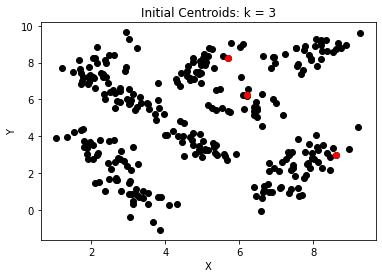

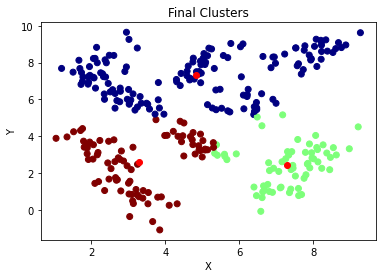

Final centroids:
 [[4.83375318 7.31605824]
 [7.30031546 2.44948999]
 [3.29726377 2.60250684]]
Loss:
 1338.0878542012097


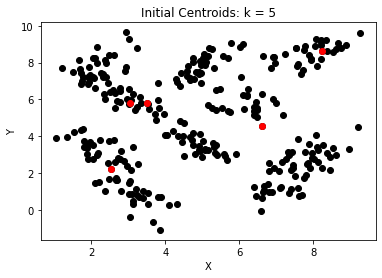

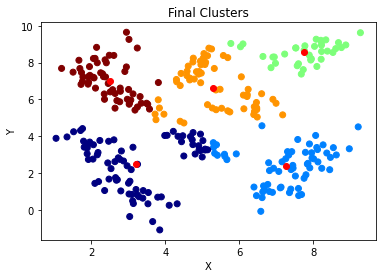

Final centroids:
 [[3.21257461 2.49658087]
 [7.25262683 2.40015826]
 [7.75648325 8.55668928]
 [5.29629878 6.64908797]
 [2.51976116 7.02028909]]
Loss:
 613.9866286066631


In [15]:
# print test results k = 3,5
k_all = k1, k2
c_all = i_point1, i_point2
n = len(k_all)
err = np.empty(n)
for i in range(n):
    plot_centroids(data, c_all[i], k_all[i])
    result = k_means(data, c_all[i])
    final_c = result[0]
    final_cluster = result[1]
    err[i] = loss(data, final_cluster, final_c)
    plot_clusters(data, final_c, final_cluster)
    print('Final centroids:\n', final_c)
    print('Loss:\n', err[i])

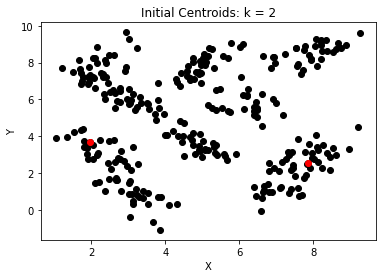

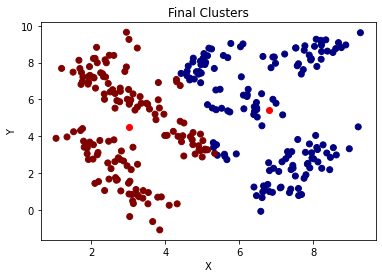

Final centroids:
 [[6.80713674 5.40112426]
 [3.01682343 4.47741928]]
Loss:
 2498.1135603167713


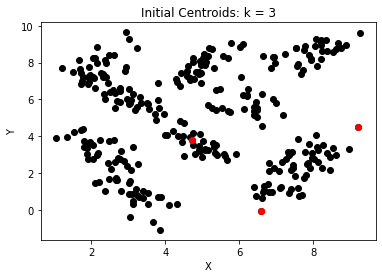

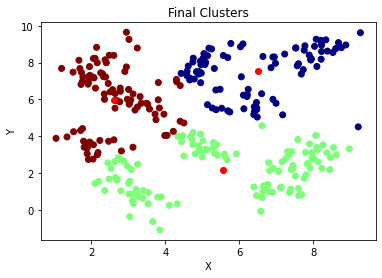

Final centroids:
 [[6.49724962 7.52297293]
 [5.55524182 2.18980958]
 [2.61946868 5.96519477]]
Loss:
 1294.2984174853175


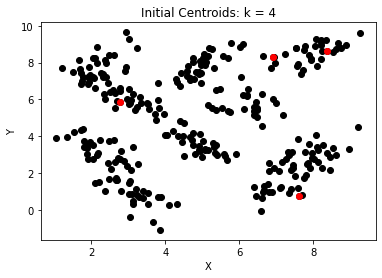

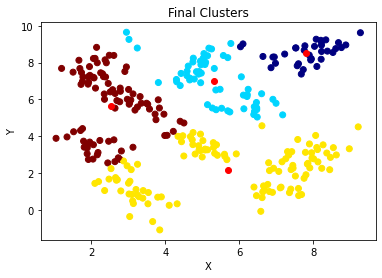

Final centroids:
 [[7.81162328 8.54324304]
 [5.31994925 6.99834383]
 [5.68808846 2.19267242]
 [2.53509692 5.66765412]]
Loss:
 1116.331501266861


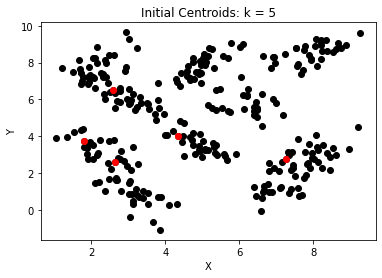

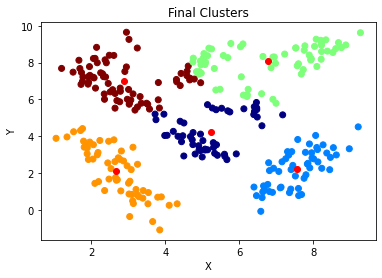

Final centroids:
 [[5.22321274 4.22502829]
 [7.55616782 2.23516796]
 [6.7786424  8.07967641]
 [2.68198633 2.09461587]
 [2.87490813 7.01082281]]
Loss:
 598.5546443663115


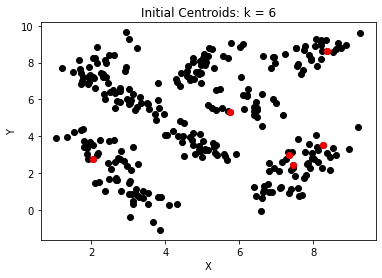

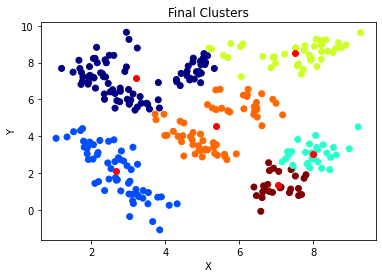

Final centroids:
 [[3.22202355 7.15937996]
 [2.68198633 2.09461587]
 [7.98675824 3.01272931]
 [7.49365367 8.52417952]
 [5.37514379 4.53101654]
 [7.05668293 1.33319679]]
Loss:
 542.5832226757337


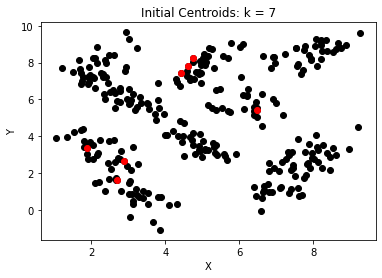

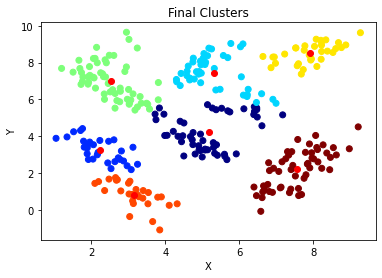

Final centroids:
 [[5.17184179 4.21915369]
 [2.24204752 3.25100749]
 [5.30944451 7.4514427 ]
 [2.54165252 7.00267832]
 [7.91430998 8.51990981]
 [3.16906145 0.81432515]
 [7.55616782 2.23516796]]
Loss:
 363.2204443859031


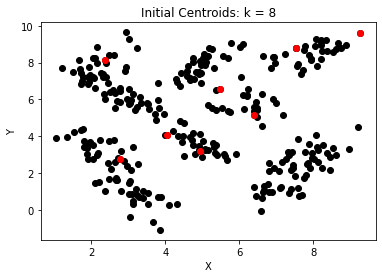

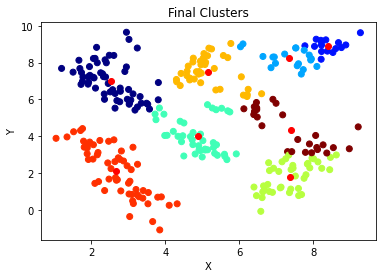

Final centroids:
 [[2.54165252 7.00267832]
 [8.39870753 8.92549706]
 [7.34195588 8.23743982]
 [4.88635979 3.99475389]
 [7.36232166 1.80445957]
 [5.15295442 7.49728224]
 [2.68198633 2.09461587]
 [7.40149857 4.3674368 ]]
Loss:
 410.41633306908494


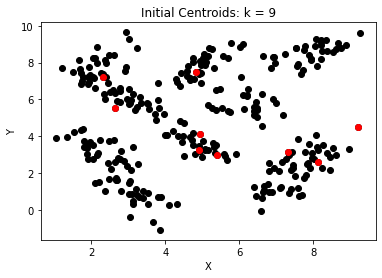

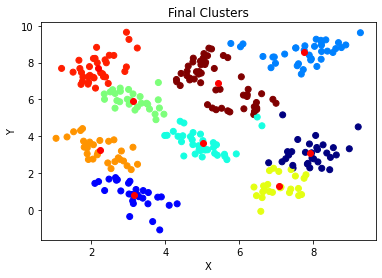

Final centroids:
 [[7.92192705 3.06756108]
 [3.16906145 0.81432515]
 [7.75648325 8.55668928]
 [5.00870811 3.63632857]
 [3.13834768 5.93372322]
 [7.06768979 1.28199329]
 [2.24204752 3.25100749]
 [2.18321462 7.70355341]
 [5.41183685 6.90440774]]
Loss:
 258.4980752850207


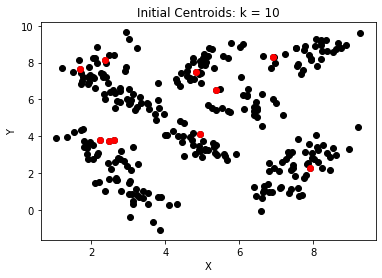

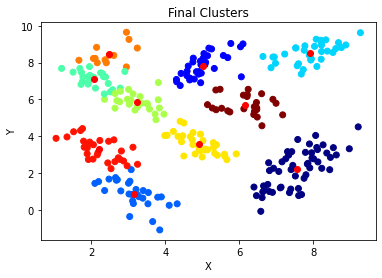

Final centroids:
 [[7.55616782 2.23516796]
 [5.0217766  7.82401258]
 [3.16603973 0.86168861]
 [7.91430998 8.51990981]
 [2.09020873 7.11836287]
 [3.23111256 5.84881764]
 [4.91251497 3.56314096]
 [2.47756519 8.44763666]
 [2.21406805 3.28644555]
 [6.15468228 5.70140721]]
Loss:
 219.0164952836794


In [18]:
# print results k = 2-10, init. 1
err_1 = np.empty(9)
for i in range(2,11):
    k_points = initial(1, i)
    plot_centroids(data, k_points, i)
    result = k_means(data, k_points)
    final_c = result[0]
    final_cluster = result[1]
    err_1[i-2] = loss(data, final_cluster, final_c)
    plot_clusters(data, final_c, final_cluster)
    print('Final centroids:\n', final_c)
    print('Loss:\n', err_1[i-2])

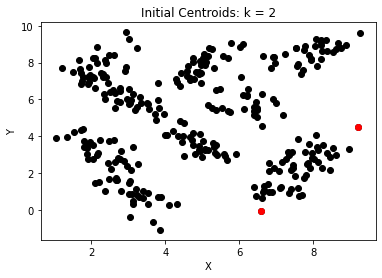

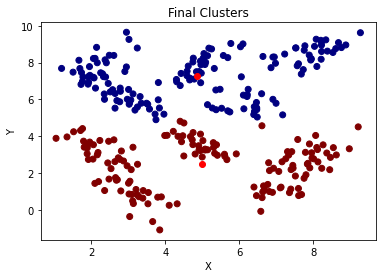

Final centroids:
 [[4.85261193 7.27164171]
 [5.00056234 2.48542748]]
Loss:
 1921.0334858562055


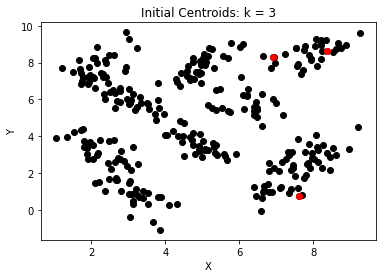

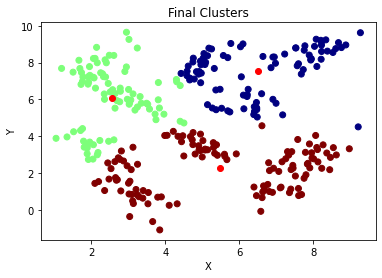

Final centroids:
 [[6.49724962 7.52297293]
 [2.56146449 6.08861338]
 [5.47740039 2.25498103]]
Loss:
 1293.777452391135


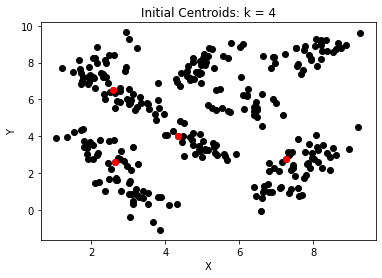

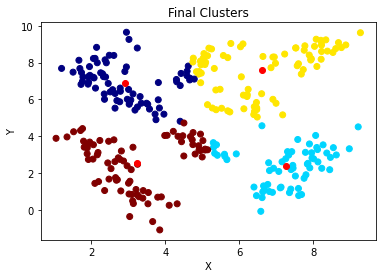

Final centroids:
 [[2.90547741 6.90512276]
 [7.25262683 2.40015826]
 [6.62592538 7.57614917]
 [3.22853009 2.52404863]]
Loss:
 789.2379722177951


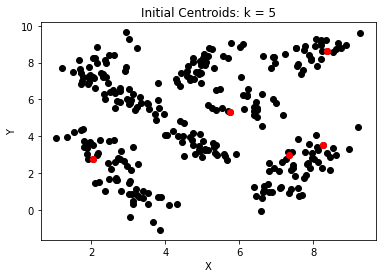

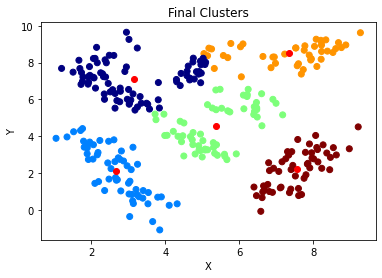

Final centroids:
 [[3.15072761 7.12192906]
 [2.68198633 2.09461587]
 [5.37514379 4.53101654]
 [7.33879537 8.50143674]
 [7.55616782 2.23516796]]
Loss:
 592.4349842663182


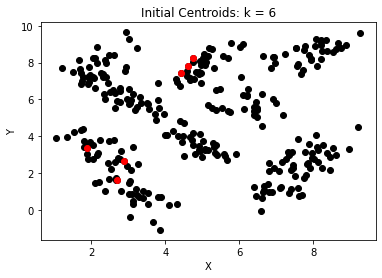

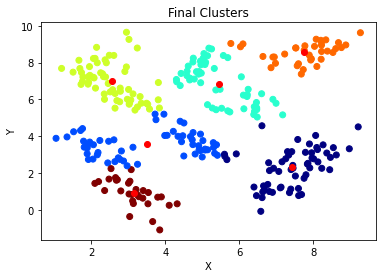

Final centroids:
 [[7.41419243 2.32169114]
 [3.49556658 3.56611232]
 [5.46427736 6.83771354]
 [2.56333815 6.9782248 ]
 [7.75648325 8.55668928]
 [3.14506148 0.90770655]]
Loss:
 476.118751676353


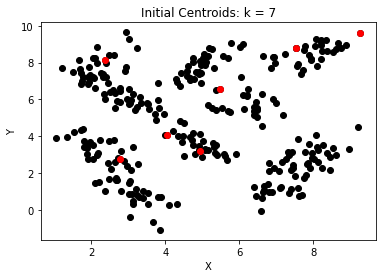

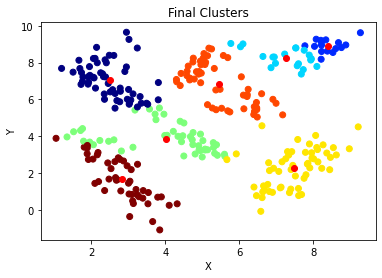

Final centroids:
 [[2.51225736 7.05717003]
 [8.39870753 8.92549706]
 [7.26716951 8.27569287]
 [4.0229351  3.87082473]
 [7.47768232 2.29900315]
 [5.46427736 6.83771354]
 [2.82544756 1.65467536]]
Loss:
 468.5875964206495


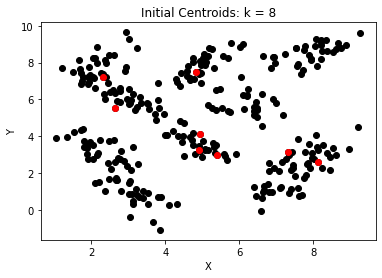

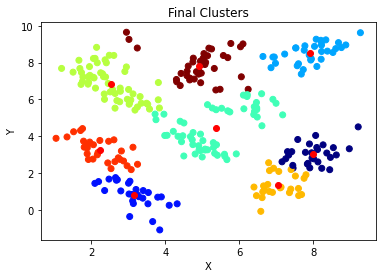

Final centroids:
 [[7.98675824 3.01272931]
 [3.16906145 0.81432515]
 [7.91430998 8.51990981]
 [5.3582714  4.42534101]
 [2.53650108 6.85941978]
 [7.05668293 1.33319679]
 [2.24204752 3.25100749]
 [4.92373109 7.83373154]]
Loss:
 319.527218038741


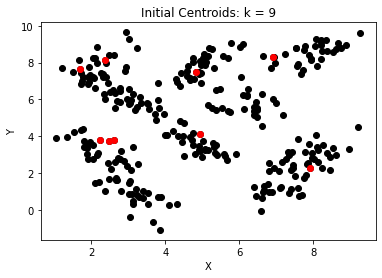

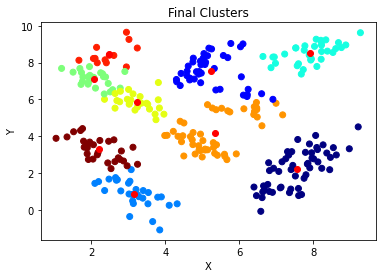

Final centroids:
 [[7.55616782 2.23516796]
 [5.24028296 7.53131029]
 [3.16603973 0.86168861]
 [7.91430998 8.51990981]
 [2.09020873 7.11836287]
 [3.23111256 5.84881764]
 [5.34560332 4.20335478]
 [2.47756519 8.44763666]
 [2.21406805 3.28644555]]
Loss:
 292.12508578795854


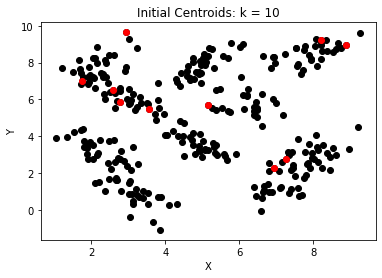

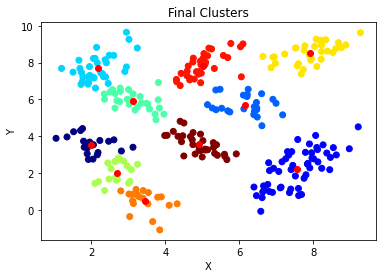

Final centroids:
 [[2.00857179 3.54850646]
 [7.55616782 2.23516796]
 [6.15468228 5.70140721]
 [2.18321462 7.70355341]
 [3.13834768 5.93372322]
 [2.69805343 2.0242299 ]
 [7.91430998 8.51990981]
 [3.44650803 0.47784504]
 [5.0217766  7.82401258]
 [4.91251497 3.56314096]]
Loss:
 214.9942723254449


In [16]:
# print results k = 2-10, init. 2
err_2 = np.empty(9)
for i in range(2,11):
    k_points = initial(2, i)
    plot_centroids(data, k_points, i)
    result = k_means(data, k_points)
    final_c = result[0]
    final_cluster = result[1]
    err_2[i-2] = loss(data, final_cluster, final_c)
    plot_clusters(data, final_c, final_cluster)
    print('Final centroids:\n', final_c)
    print('Loss:\n', err_2[i-2])

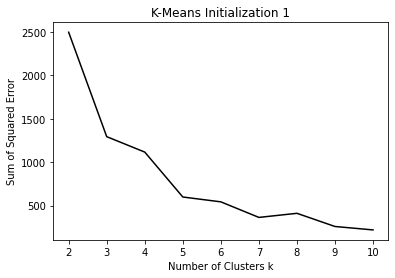

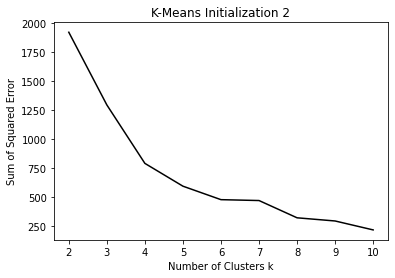

In [19]:
# display objective function for 2 initializations
plot_loss(1, ([2,3,4,5,6,7,8,9,10]), err_1)
plot_loss(2, ([2,3,4,5,6,7,8,9,10]), err_2)